# Goals of this notebook
- Topic modeling
- Theory and Implementation of Latent Dirichlet Allocation
- Theory and Implementation of Non-Negative Matrix Factorization

## 1. Topic Modeling
Topic modeling allows us to efficiently analyze large volumes of text by clustering documents into topics. This is done in order to identify labels in an unlabeled data.

### 1.1 Latent Dirichlet Allocation
It is one of the most popular topic modeling methods. As we know, each document is made up of various words and sentences, and each topic has various words belonging to it. The goal of LDA is to find topics a document belongs to based on the words in it.

LDA represents documents as mixtures of topics that spit out words with certain probabilities.

The key components of the LDA model are:
- **Documents** $ d $: A collection of text documents
- **Topics** $ k $: A fixed number of topics.
- **Words** $ v $: A vocabulary of words.

LDA was first published as a graphical model for topic discovery in Journal of Machine Learning Research by David Blei, Andrew Ng and Michael L.

Assumptions of LDA for Topic Modeling:
- Documents with similar topics use similar group of words
- Latent topics can be found by searching for groups of words that frequently occur together in documents across the corpus.

### 1.2 Latent Dirichlet Allocation (Working)
The steps involved in the LDA algorithm are as follows:

#### Initialization
For each document in the corpus, assign each word to one of $ k $ pre-defined topics randomly.

#### Gibbs Sampling
For each document $ d $ and each word $ w $ in the document:

#### Remove Current Topic Assignment
Remove the current topic assignment by decreasing the count of the word $ w $ in the current topic $ t $ and decrease the count of topic $ t $ in the document $ d $.

Specifically:
- Decrease $ n_{d,t} $: the count of words in document $ d $ assigned to topic $ t $.
- Decrease $ n_{t,w} $: the count of occurrences of word $ w $ assigned to topic $ t $.
- Decrease $ n_{t} $: the total number of words assigned to topic $ t $.

#### Re-calculate Probabilities
Compute the conditional probability for each topic $ t $:

$$ P(\text{topic } t \mid \text{document } d) \propto \frac{n_{d,t} + \alpha}{n_d + k\alpha} $$

where $ \alpha $ is the hyperparameter for Dirichlet prior on document-topic distribution, $ n_{d,t} $ is the number of words in document $ d $ assigned to topic $ t $, and $ n_d $ is the total number of words in document $ d $.

$$ P(\text{word } w \mid \text{topic } t) \propto \frac{n_{t,w} + \beta}{n_{t} + V\beta} $$

where $ \beta $ is the hyperparameter for Dirichlet prior on topic-word distribution, $ n_{t,w} $ is the number of occurrences of word $ w $ assigned to topic $ t $, $ n_t $ is the total number of words assigned to topic $ t $, and $ V $ is the vocabulary size.

#### Sample New Topic
Choose a new topic $ t $ for word $ w $ based on the computed probabilities using a sampling method (typically, multinomial sampling).

#### Repeat
Repeat the sampling process for a large number of iterations until the topic assignments stabilize (i.e., the topic assignments do not change significantly).

#### Estimate Distributions
After convergence, estimate the distributions:
- **Topic-Word Distribution $ \phi $**: the probability of a word given a topic.

$$ \phi_{t,w} = \frac{n_{t,w} + \beta}{n_{t} + V\beta} $$

- **Document-Topic Distribution $ \theta $**: the probability of a topic given a document.

$$ \theta_{d,t} = \frac{n_{d,t} + \alpha}{n_d + k\alpha} $$

For further reading you can go through this [paper](https://ai.stanford.edu/~ang/papers/jair03-lda.pdf)

### 1.4 Latent Dirichlet Allocation Using scikit-learn

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("./npr.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11992 entries, 0 to 11991
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  11992 non-null  object
dtypes: object(1)
memory usage: 93.8+ KB


In [4]:
df.head(5)

,Article
0,"In the Washington of 2016, even when the polic..."
1,Donald Trump has used Twitter — his prefe...
2,Donald Trump is unabashedly praising Russian...
3,"Updated at 2:50 p. m. ET, Russian President Vl..."
4,"From photography, illustration and video, to d..."


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
"""
    Here max_df means When building the vocabulary ignore terms that 
    have a document frequency strictly higher than the given threshold
    (corpus-specific stop words).
    
    Here min_df means When building the vocabulary ignore terms that
    have a document frequency strictly lower than the given threshold.
    This value is also called cut-off in the literature.
    
    We want to skip terms that occurr too frequently, in 90% of the
    documents and those that do not occurr at all or occurr less frequently,
    less than 2 documents.
"""
vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")

In [7]:
doc_term_matrix = vectorizer.fit_transform(df["Article"])

In [8]:
doc_term_matrix

<11992x54777 sparse matrix of type '<class 'numpy.int64'>'
	with 3033388 stored elements in Compressed Sparse Row format>

In [9]:
from sklearn.decomposition import LatentDirichletAllocation

In [10]:
# n_components depends upon you
LDA = LatentDirichletAllocation(n_components=10, random_state=42)

In [11]:
%%time
LDA.fit(doc_term_matrix)

CPU times: total: 9min 44s
Wall time: 2min 37s


LatentDirichletAllocation(random_state=42)

In [12]:
# get the very first topic
topic = LDA.components_[0]

In [13]:
# returns an array that contains sorted values indexes
top_twenty_words = topic.argsort()[-20:]

In [14]:
for idx in top_twenty_words:
    print(vectorizer.get_feature_names_out()[idx])

industry
tax
business
percent
pay
people
care
government
year
insurance
000
federal
new
money
companies
million
health
company
said
says


In [15]:
topic_names = {}

for index, topic in enumerate(LDA.components_):
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in topic.argsort()[-15:]]
    topic_names[index] = ", ".join(top_words[:3])
    
    print(f"Top 15 words for topic #{index}")
    print(top_words)
    print("\n")

Top 15 words for topic #0
['people', 'care', 'government', 'year', 'insurance', '000', 'federal', 'new', 'money', 'companies', 'million', 'health', 'company', 'said', 'says']


Top 15 words for topic #1
['npr', 'intelligence', 'security', 'new', 'told', 'russian', 'campaign', 'obama', 'news', 'white', 'russia', 'house', 'president', 'said', 'trump']


Top 15 words for topic #2
['know', 'little', 'home', 'make', 'way', 'day', 'water', 'time', 'years', 'people', 'food', 'new', 'just', 'like', 'says']


Top 15 words for topic #3
['don', 'food', 'work', 'day', 'life', 'time', 'family', 'children', 'years', 'just', 'women', 'world', 'like', 'people', 'says']


Top 15 words for topic #4
['supreme', 'order', 'city', 'states', 'federal', 'country', 'president', 'rights', 'government', 'people', 'law', 'state', 'said', 'court', 'says']


Top 15 words for topic #5
['going', 've', 'story', 'life', 'don', 'new', 'way', 'time', 'really', 'know', 'think', 'music', 'people', 'just', 'like']


Top 15 

In [16]:
%%time
topic_results = LDA.transform(doc_term_matrix)

CPU times: total: 38.9 s
Wall time: 10.1 s


In [17]:
# get the index position of the highest probability
topic_results[0].argmax()

1

In [18]:
topic_results[0]

array([8.78101114e-03, 9.11263140e-01, 1.57269537e-04, 1.57265808e-04,
       1.57268730e-04, 1.57266519e-04, 1.57271636e-04, 1.57262374e-04,
       7.88549762e-02, 1.57267682e-04])

In [19]:
df["Topic"] = topic_results.argmax(axis=1)

In [20]:
df

,Article,Topic
0,"In the Washington of 2016, even when the polic...",1
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",1
4,"From photography, illustration and video, to d...",6
...,...,...
11987,The number of law enforcement officers shot an...,7
11988,"Trump is busy these days with victory tours,...",1
11989,It’s always interesting for the Goats and Soda...,3
11990,The election of Donald Trump was a surprise to...,8


In [21]:
df["Topic"] = df["Topic"].map(topic_names)

In [22]:
df.head(10)

,Article,Topic
0,"In the Washington of 2016, even when the polic...","npr, intelligence, security"
1,Donald Trump has used Twitter — his prefe...,"npr, intelligence, security"
2,Donald Trump is unabashedly praising Russian...,"npr, intelligence, security"
3,"Updated at 2:50 p. m. ET, Russian President Vl...","npr, intelligence, security"
4,"From photography, illustration and video, to d...","don, student, think"
5,I did not want to join yoga class. I hated tho...,"doctors, university, brain"
6,With a who has publicly supported the debunk...,"doctors, university, brain"
7,"I was standing by the airport exit, debating w...","know, little, home"
8,"If movies were trying to be more realistic, pe...","know, little, home"
9,"Eighteen years ago, on New Year’s Eve, David F...","know, little, home"


### Visualizing Topics and Top Words

In [23]:
import matplotlib.pyplot as plt

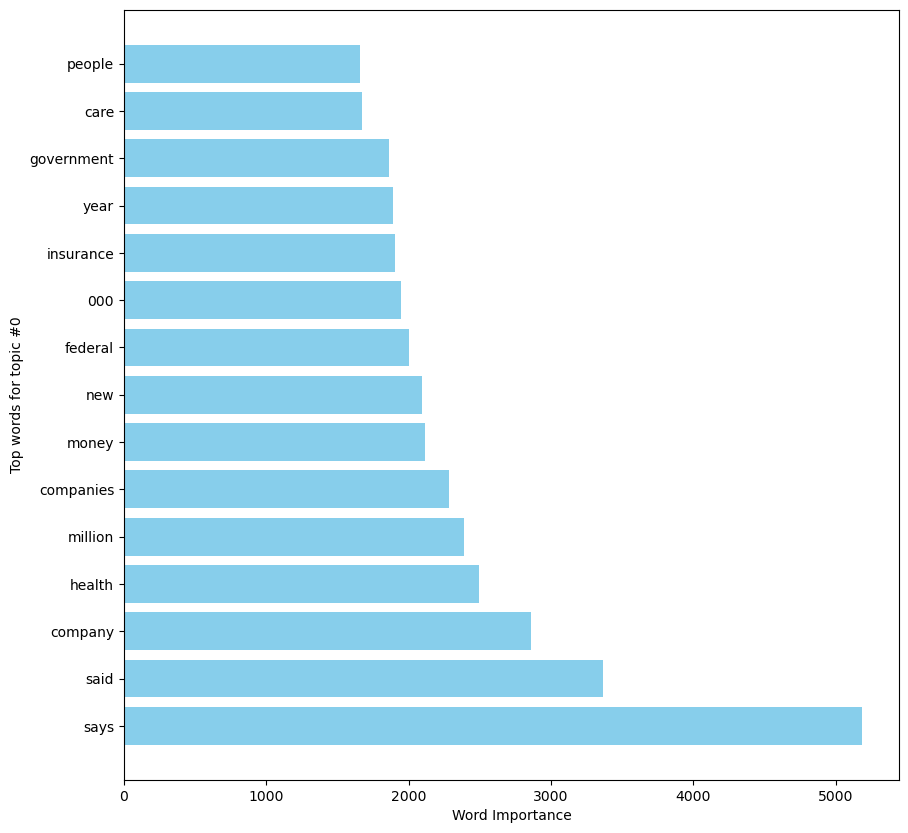

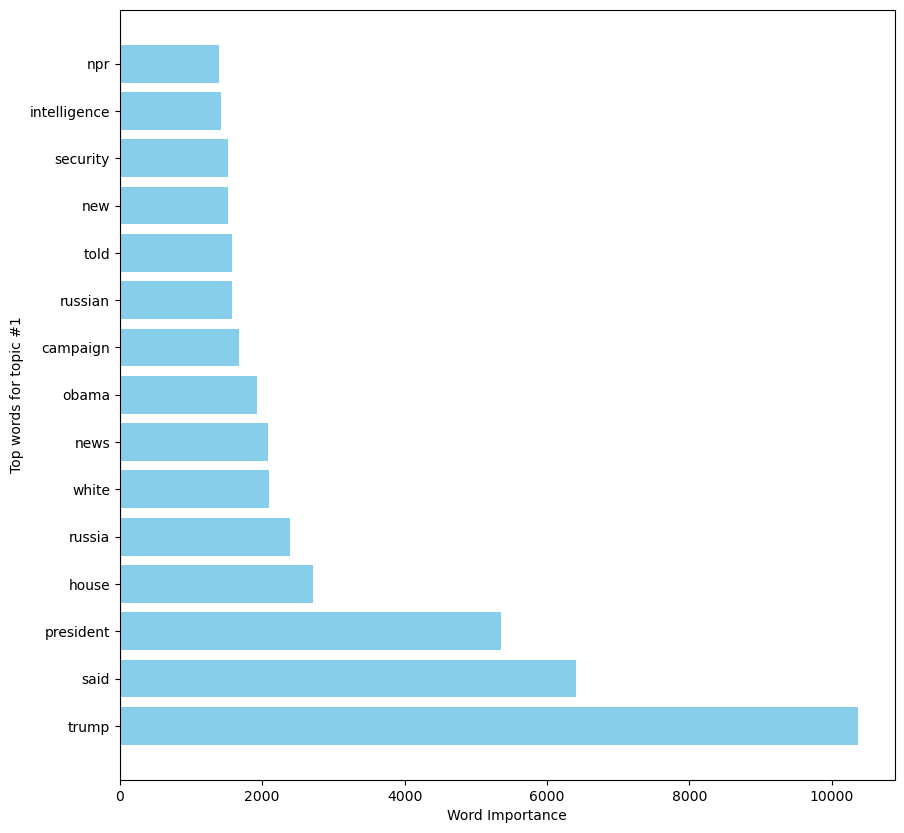

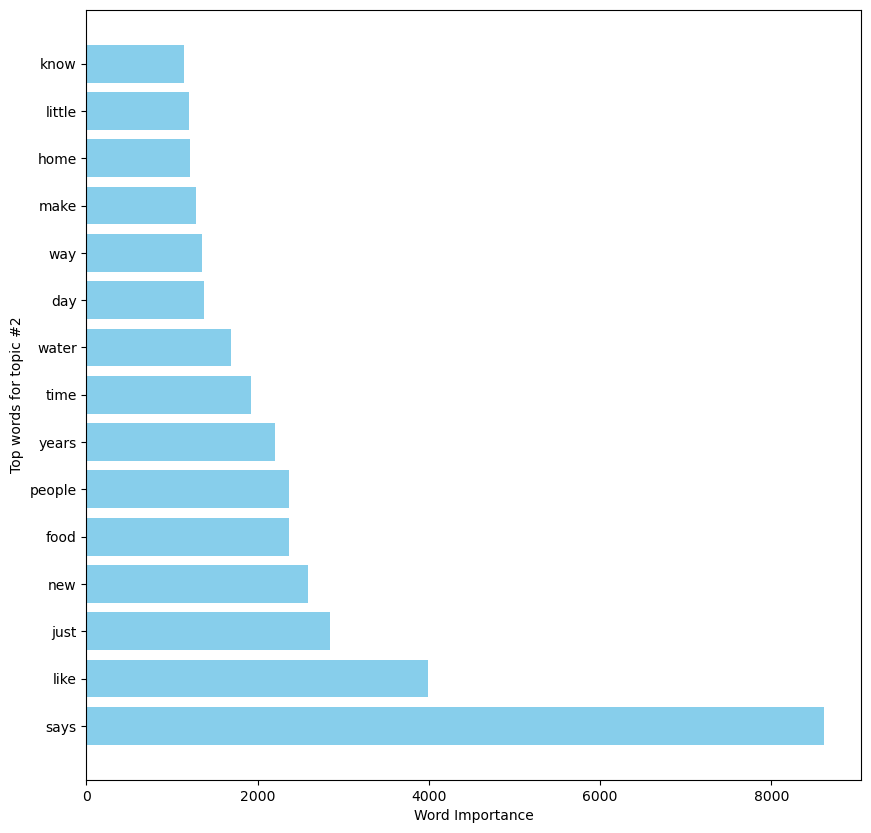

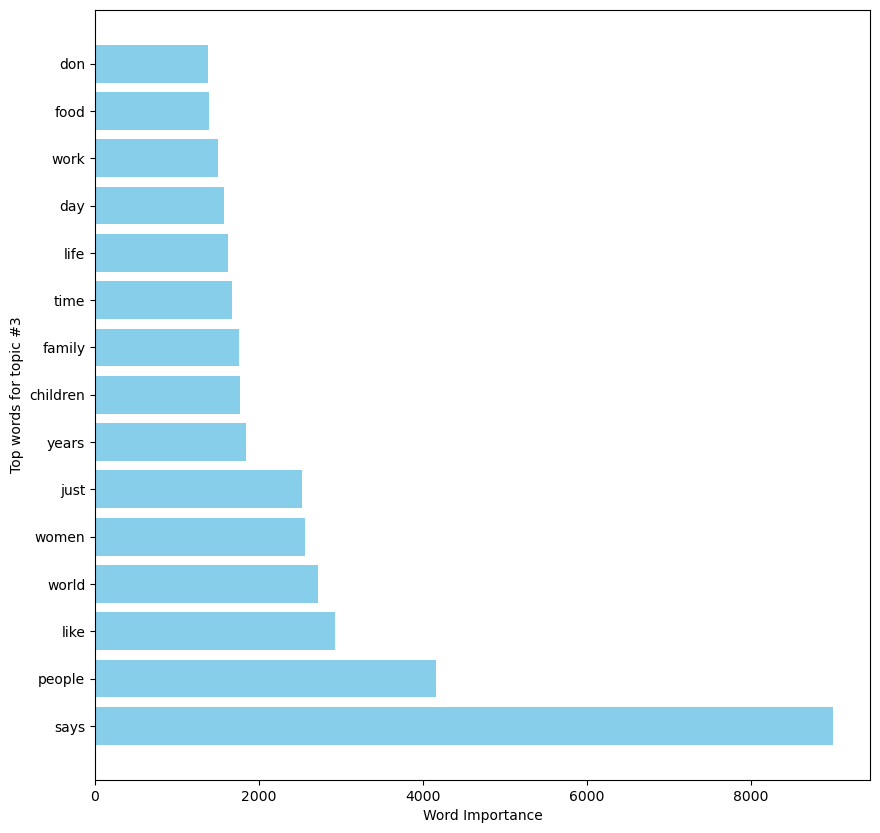

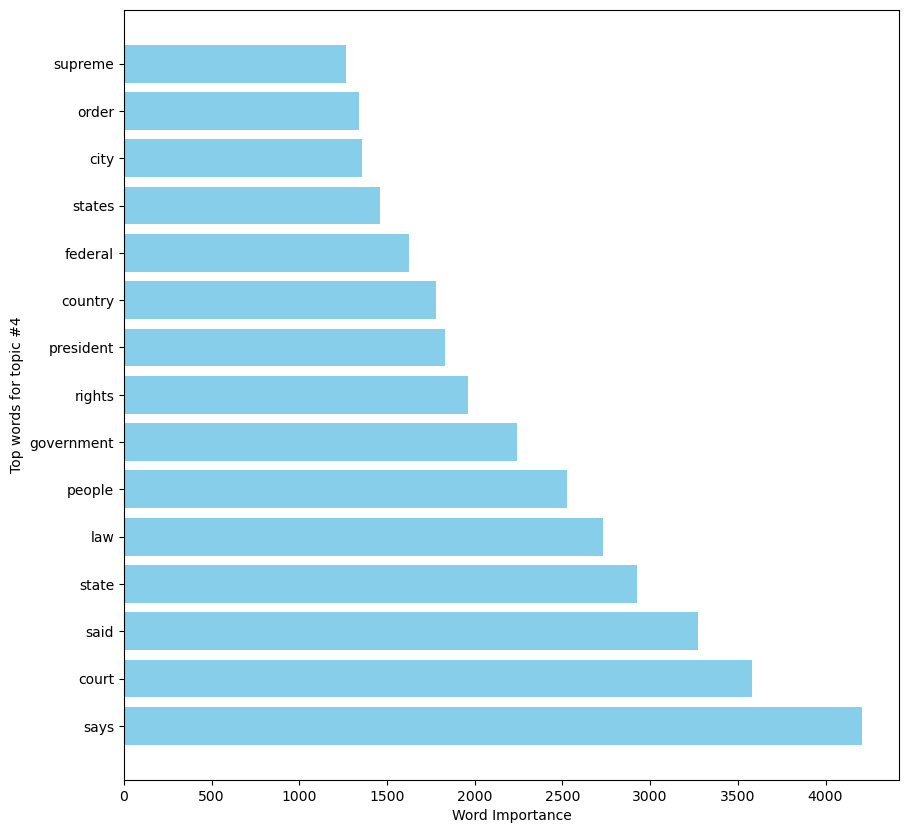

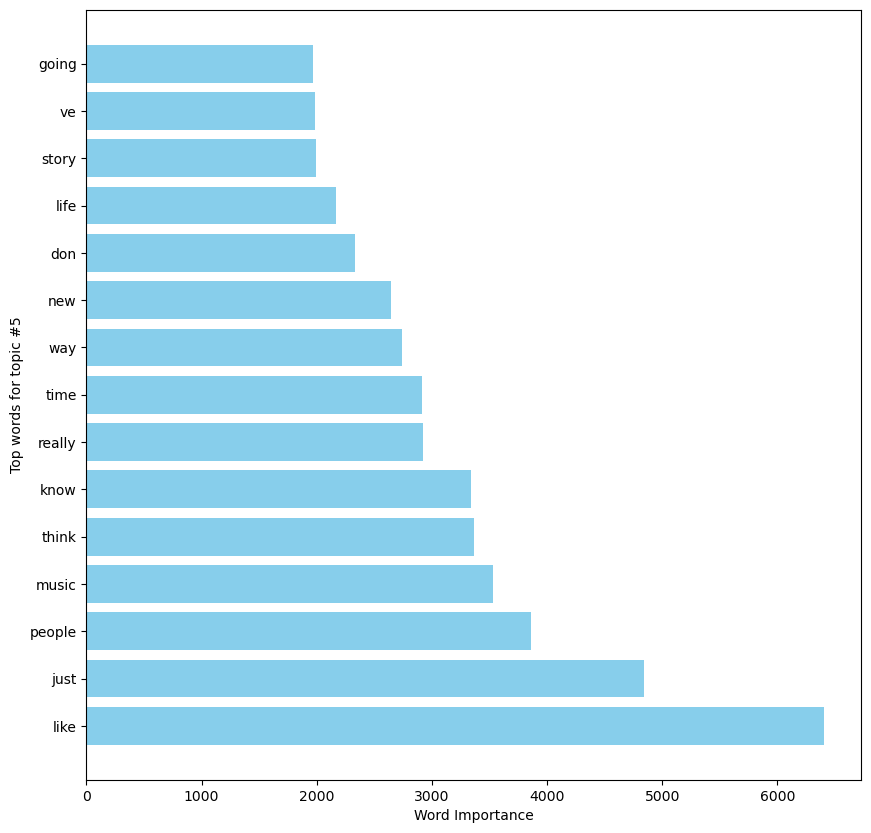

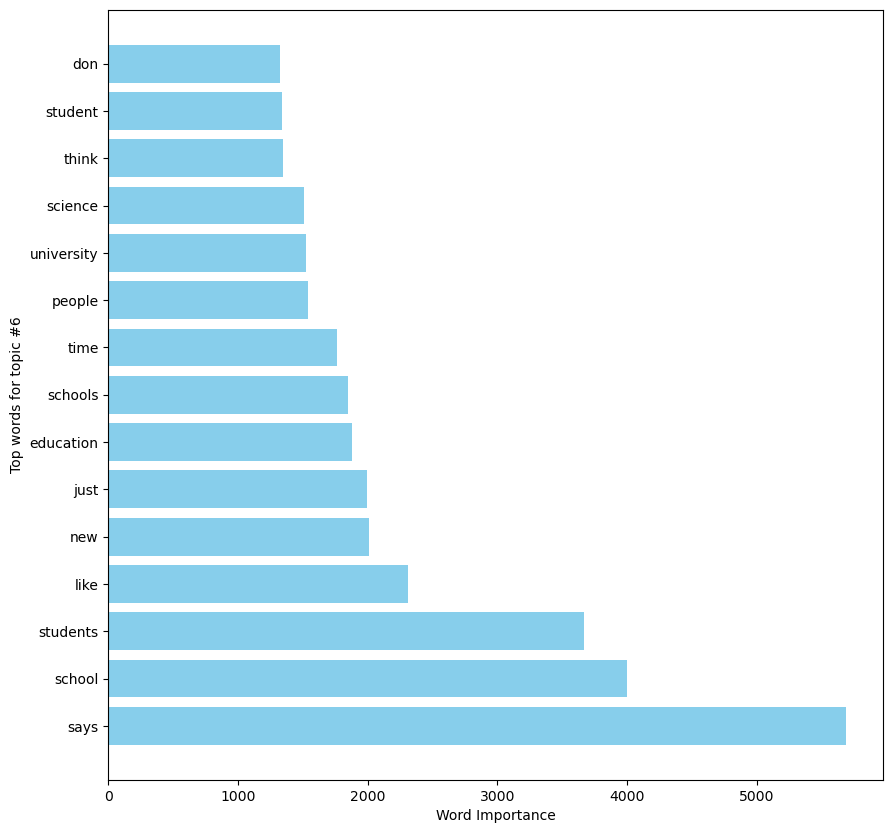

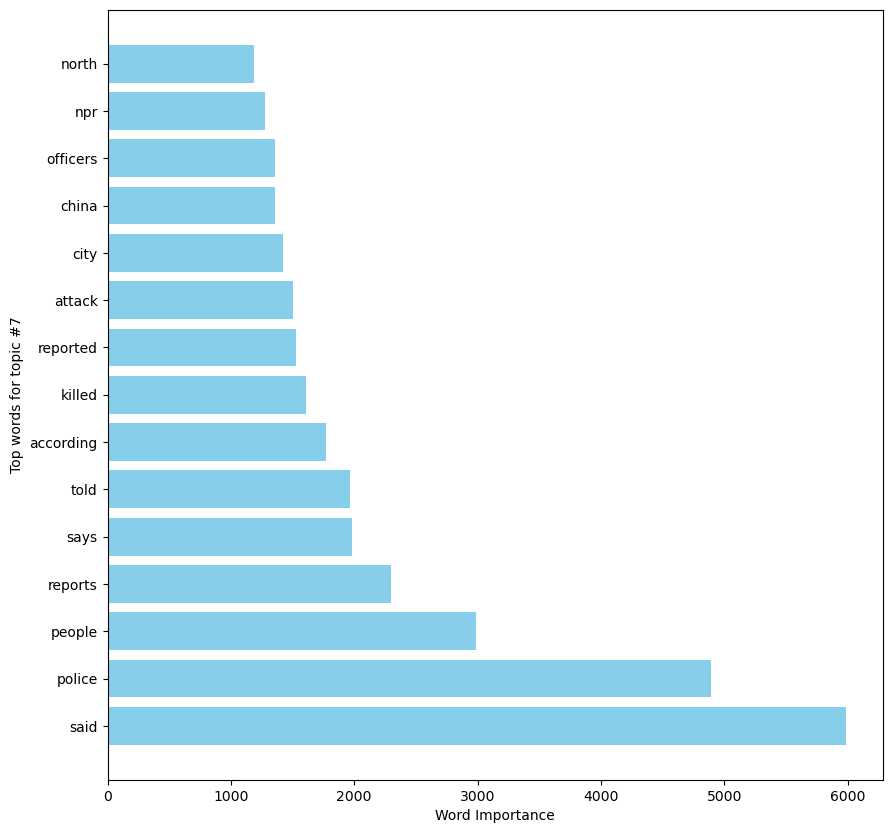

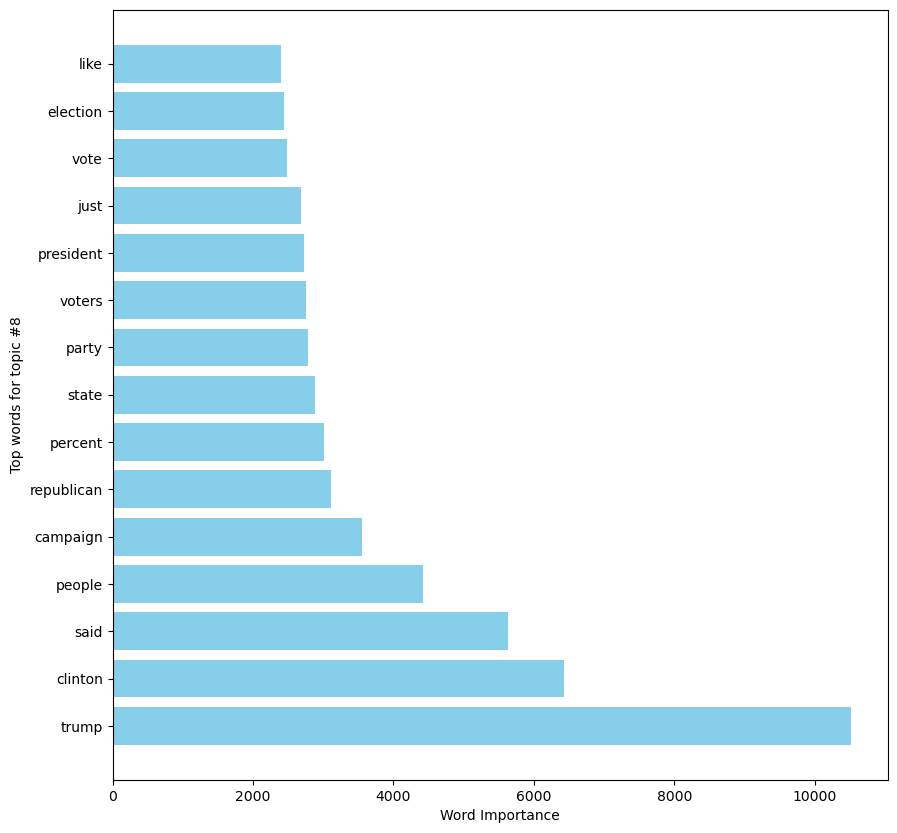

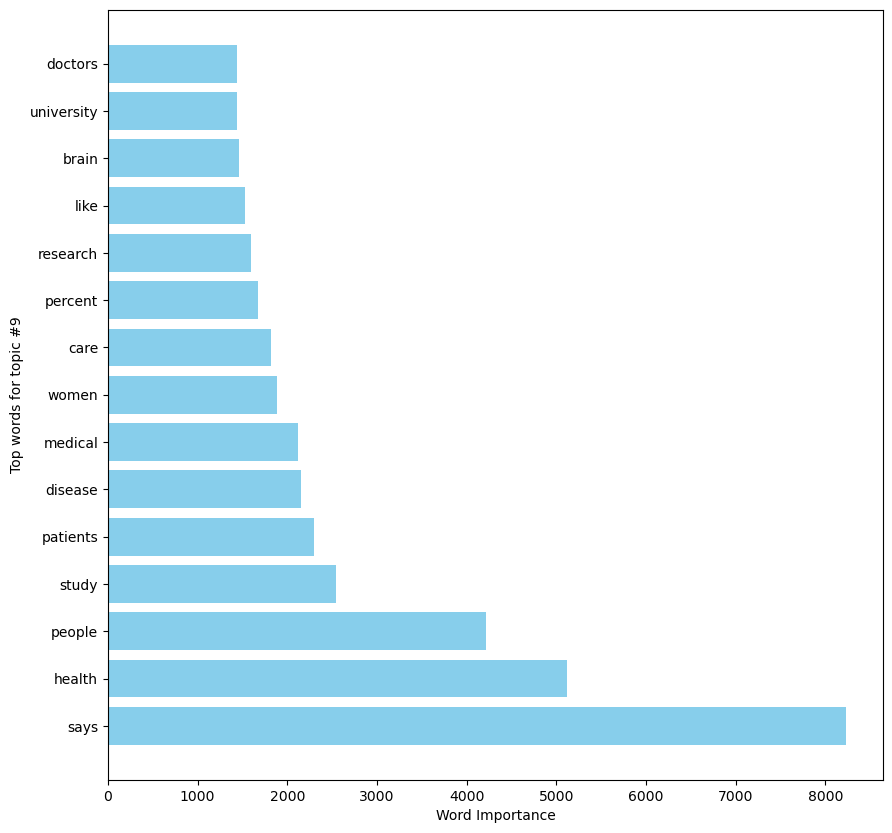

In [24]:
for index, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[-15:]
    top_words = [vectorizer.get_feature_names_out()[idx] for idx in top_words_idx]
    top_words_values = topic[top_words_idx]
    
    plt.figure(figsize=(10, 10))
    plt.barh(top_words, top_words_values, color="skyblue")
    plt.xlabel("Word Importance")
    plt.ylabel(f"Top words for topic #{index}")
    plt.gca().invert_yaxis()
    plt.show()

In [25]:
topic_df = pd.DataFrame(topic_results, columns=[f"Topic {idx}" for idx in range(LDA.n_components)])
topic_df["Topic"] = topic_df.values.argmax(axis=1)

topic_counts = topic_df["Topic"].value_counts().sort_index()

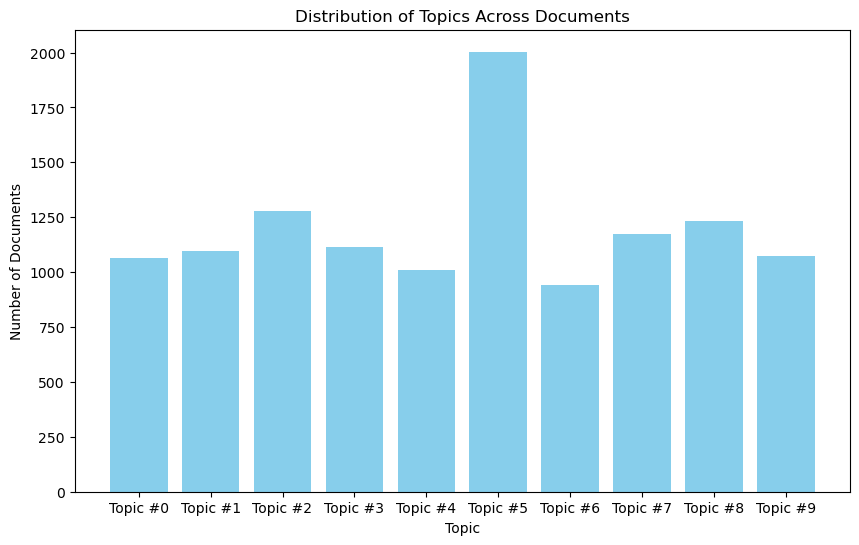

In [26]:
# Create a bar plot for topic distribution
plt.figure(figsize=(10, 6))
plt.bar(range(LDA.n_components), topic_counts, color='skyblue')
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Distribution of Topics Across Documents")
plt.xticks(range(LDA.n_components), [f"Topic #{i}" for i in range(LDA.n_components)])
plt.show()

## 2. Non-Negative Matrix Factorization
Non-negative matrix factorization (NMF or NNMF), also non-negative matrix approximation is a group of algorithms in multivariate analysis and linear algebra where a matrix V is factorized into (usually) two matrices W and H, with the property that all three matrices have no negative elements. This non-negativity makes the resulting matrices easier to inspect. Also, in applications such as processing of audio spectrograms or muscular activity, non-negativity is inherent to the data being considered. Since the problem is not exactly solvable in general, it is commonly approximated numerically.

Mathematically, Given a non-negative matrix $ V $ of dimensions $ n \cdot m $, NMF seeks to find two non-negative matrices $ W $ which is of dimensions $ n \cdot k $ and $ H $ which is of dimensions $ k \cdot m $.

Here:
- $ V $ is the data matrix (Rows = Features, Cols = Objects)
- $ W $ is the basis vectors (Rows = Features)
- $ H $ is the co-efficient matrix (Cols = Objects)
- $ W \geq 0 $, $ H \geq 0 $

$$ V \approx WH $$

![Illustration of approximate non-negative matrix factorization](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/NMF.png/400px-NMF.png)

The decomposition is carried out through the following functions:
$$ H_{ij}^{n+1} \leftarrow H_{ij}^n \frac{\left( (W^n)^T V \right)_{ij}}{\left( (W^n)^T W^n H^n \right)_{ij}} $$

$$ W_{ij}^{n+1} \leftarrow W_{ij}^n \frac{\left( V (H^{n+1})^T \right)_{ij}}{\left( W^n H^{n+1} (H^{n+1})^T \right)_{ij}} $$

- Approximate each object (i.e. column of $ V $) by a linear combination of $ k $ reduced dimensions or "basis vectors" in $ W $.
- Each basis vector can then be interpreted as a cluster. The memberships of objects in these clusters is encoded by $ H $.

**The objective function**: the objective function aims to measure the reconstruction error between the original matrix $ V $ and its approximation $ WH $

$$ \frac{1}{2} \| V - WH \|_F^2 = \sum_{i=1}^n \sum_{j=1}^m \left( V_{ij} - (WH)_{ij} \right)^2 $$

For further understanding, checkout the following links:
- [Non-negative Matrix Factorization, An Implementation](https://www.youtube.com/watch?v=dyuCcWzmssE)
- [The why and how of non-negative matrix factorization](https://blog.acolyer.org/2019/02/18/the-why-and-how-of-nonnegative-matrix-factorization/)

### 2.1 NMF Implementation

In [27]:
import numpy as np

class NMF:
    def __init__(self, n_components, iters = 500, tolerance = 1e-4):
        self.n_components = n_components
        self.iters = 500
        self.tolerance = tolerance
        self.W = None
        self.H = None
    
    def fit(self, V):
        if np.any(V < 0):
            raise ValueError("Input data matrix V must contain non-negative values")
            
        self.W = np.random.rand(V.shape[0], self.n_components)
        self.H = np.random.rand(self.n_components, V.shape[1])
        
        self._nmf_update(V)
    
    def transform(self, V):
        if not hasattr(self, "W") and not hasattr(self, "H"):
            raise RuntimeError("The model has not been fitted yet.")
        
        return np.dot(self.W, self.H)
    
    def fit_transform(self, V):
        self.fit(V)
        return self.transform(V)
    
    def _nmf_update(self, V):
        for _ in range(self.iters):
            self.H *= np.dot(self.W.T, V) / np.dot(np.dot(self.W.T, self.W), self.H)
            self.H[self.H < 0] = 0
            
            self.W *= np.dot(V, self.H.T) / np.dot(self.W, np.dot(self.H, self.H.T))
            self.W[self.W < 0] = 0
            
            V_approx = np.dot(self.W, self.H)
            err = np.linalg.norm(V - V_approx, "fro")
            
            if err < self.tolerance:
                break
    
    def get_W(self):
        if not hasattr(self, 'W'):
            raise RuntimeError("The model has not been fitted yet.")
        # basis matrix
        return self.W

    def get_H(self):
        if not hasattr(self, 'H'):
            raise RuntimeError("The model has not been fitted yet.")
        # coefficient matrix
        return self.H

In [28]:
import matplotlib.pyplot as plt

In [29]:
V = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

nmf = NMF(n_components=5, iters=1000, tolerance=1e-4)
V_approx = nmf.fit_transform(V)

W = nmf.get_W()
H = nmf.get_H()

In [30]:
print("Original Matrix V:\n", V)
print("\n")
print("Factorized Matrix W:\n", W)
print("\n")
print("Factorized Matrix H:\n", H)
print("\n")
print("Approximated Matrix V_approx:\n", V_approx)

Original Matrix V:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Factorized Matrix W:
 [[5.68747663e-01 1.58604522e-02 2.28243123e-01 2.81374269e-01
  1.16846054e-03]
 [6.79983046e-01 4.28034854e-01 7.34187917e-02 1.74449666e+00
  6.53111727e-01]
 [1.02945146e+00 6.82410314e-01 8.10064540e-01 9.07147270e-01
  1.10724818e+00]]


Factorized Matrix H:
 [[0.44884837 3.10095773 3.83317762]
 [4.81335936 1.9276904  2.91529826]
 [2.27597571 0.62481321 2.15467284]
 [0.52585826 0.214199   0.99998637]
 [0.84219703 2.52136766 0.37205339]]


Approximated Matrix V_approx:
 [[1.00004638 2.00006203 2.99994319]
 [4.00000097 4.99999461 6.00000384]
 [6.99999292 7.9999901  9.00001431]]


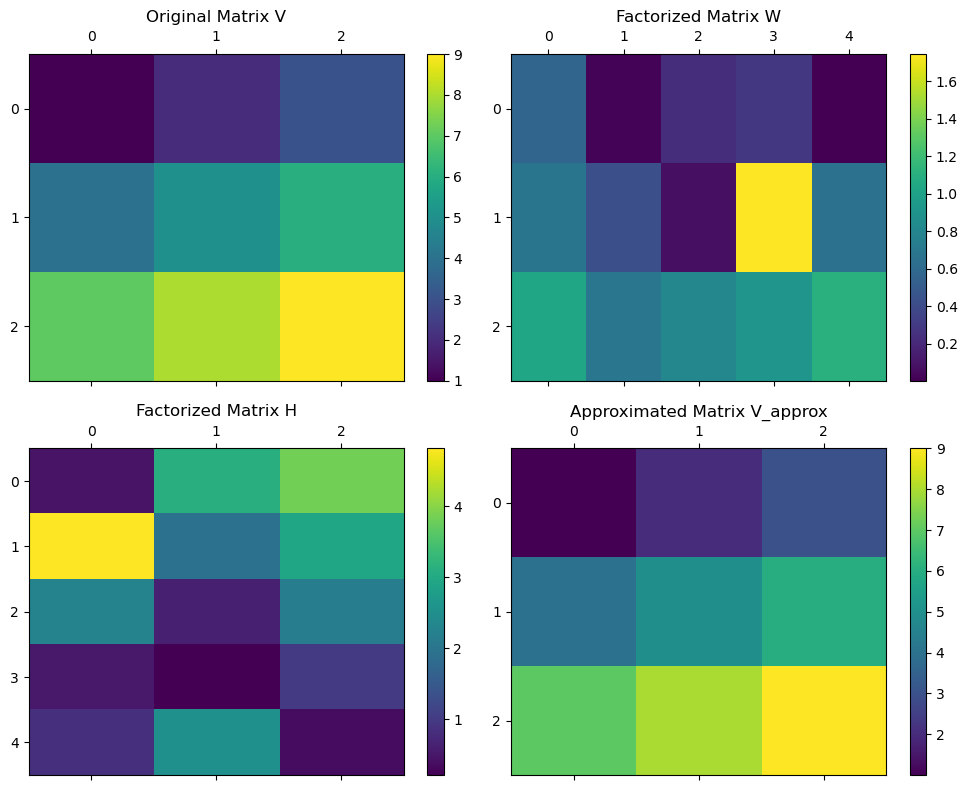

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

cax1 = ax1.matshow(V, cmap='viridis', aspect='auto')
ax1.set_title('Original Matrix V')
fig.colorbar(cax1, ax=ax1)

cax2 = ax2.matshow(W, cmap='viridis', aspect='auto')
ax2.set_title('Factorized Matrix W')
fig.colorbar(cax2, ax=ax2)

cax3 = ax3.matshow(H, cmap='viridis', aspect='auto')
ax3.set_title('Factorized Matrix H')
fig.colorbar(cax3, ax=ax3)

cax4 = ax4.matshow(V_approx, cmap='viridis', aspect='auto')
ax4.set_title('Approximated Matrix V_approx')
fig.colorbar(cax4, ax=ax4)

plt.tight_layout()
plt.show()

### 2.2 NMF with scikit-learn

In [32]:
from sklearn.decomposition import NMF

In [33]:
V = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

n_components = 5
nmf = NMF(n_components=n_components, init='random', random_state=0)

W = nmf.fit_transform(V)
H = nmf.components_

In [34]:
print("Original Matrix V:\n", V)
print("\n")
print("Factorized Matrix W:\n", W)
print("\n")
print("Factorized Matrix H:\n", H)
print("\n")
print("Approximated Matrix V_approx:\n", np.dot(W, H))

Original Matrix V:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


Factorized Matrix W:
 [[0.00000000e+00 6.11996314e-01 0.00000000e+00 1.35814316e+00
  0.00000000e+00]
 [9.13271411e-01 1.00569075e+00 8.38082314e-16 1.83784039e+00
  6.01399676e-01]
 [3.81750691e+00 8.25442480e-01 8.92036995e-01 1.68029618e+00
  0.00000000e+00]]


Factorized Matrix H:
 [[1.06161614 1.39509087 1.35560253]
 [1.13318037 2.9428833  1.66677011]
 [1.82715651 0.         0.        ]
 [0.22715012 0.14599531 1.45762886]
 [2.44988766 0.82799643 0.67645944]]


Approximated Matrix V_approx:
 [[1.00200459 1.99931627 2.99972583]
 [4.         5.         6.        ]
 [6.99967285 8.0002653  9.00009308]]


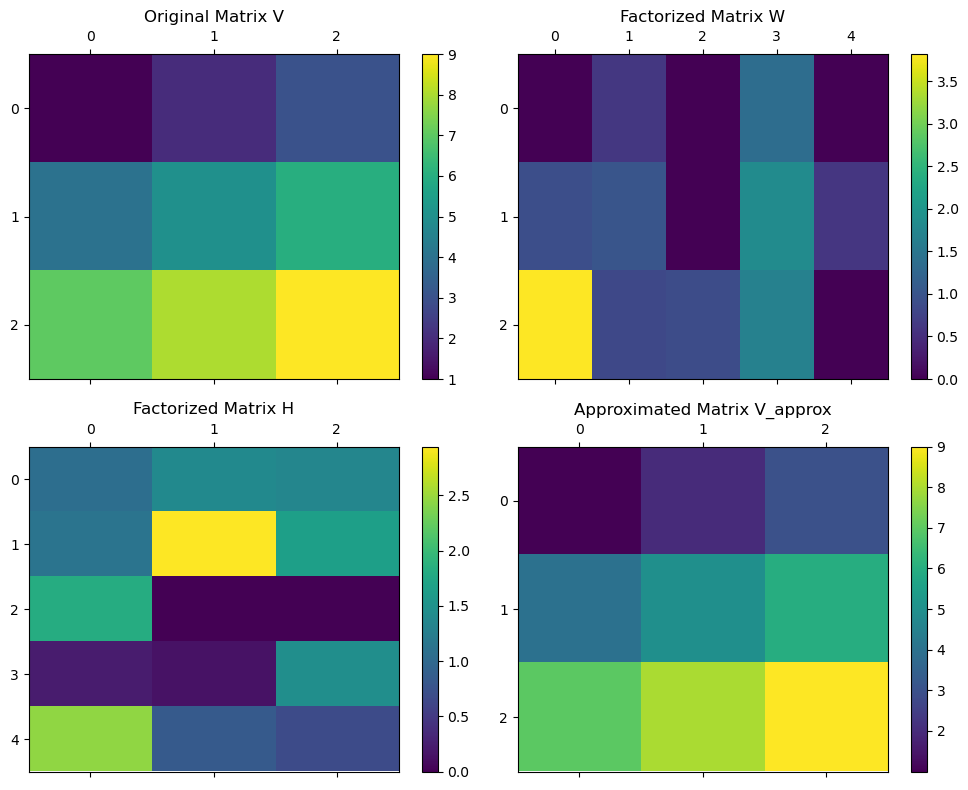

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

cax1 = ax1.matshow(V, cmap='viridis', aspect='auto')
ax1.set_title('Original Matrix V')
fig.colorbar(cax1, ax=ax1)

cax2 = ax2.matshow(W, cmap='viridis', aspect='auto')
ax2.set_title('Factorized Matrix W')
fig.colorbar(cax2, ax=ax2)

cax3 = ax3.matshow(H, cmap='viridis', aspect='auto')
ax3.set_title('Factorized Matrix H')
fig.colorbar(cax3, ax=ax3)

cax4 = ax4.matshow(np.dot(W, H), cmap='viridis', aspect='auto')
ax4.set_title('Approximated Matrix V_approx')
fig.colorbar(cax4, ax=ax4)

plt.tight_layout()
plt.show()

### 2.3 NMF on a dataset

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [37]:
df = pd.read_csv("./npr.csv")

In [38]:
tfidf = TfidfVectorizer(max_df=0.9, min_df=3, stop_words="english")

In [39]:
doc_term_matrix = tfidf.fit_transform(df["Article"])

In [40]:
doc_term_matrix

<11992x43169 sparse matrix of type '<class 'numpy.float64'>'
	with 3010172 stored elements in Compressed Sparse Row format>

In [41]:
nmf = NMF(n_components=10, random_state=42)

In [42]:
%%time
nmf.fit(doc_term_matrix)

CPU times: total: 39.5 s
Wall time: 10.8 s


NMF(n_components=10, random_state=42)

In [43]:
topic_names = {}

for index, topic in enumerate(nmf.components_):
    top_words = [tfidf.get_feature_names_out()[idx] for idx in topic.argsort()[-15:]]
    topic_names[index] = ", ".join(top_words[:3])
    
    print(f"Top 15 words for topic #{index}")
    print(top_words)
    print("\n")

Top 15 words for topic #0
['workers', 'year', '000', 'china', 'study', 'just', 'company', 'years', 'percent', 'new', 'like', 'water', 'food', 'people', 'says']


Top 15 words for topic #1
['tax', 'cruz', 'pence', 'administration', 'gop', 'presidential', 'obama', 'white', 'house', 'republican', 'campaign', 'donald', 'said', 'president', 'trump']


Top 15 words for topic #2
['repeal', 'law', 'patients', 'act', 'republicans', 'tax', 'plan', 'people', 'affordable', 'obamacare', 'coverage', 'medicaid', 'insurance', 'care', 'health']


Top 15 words for topic #3
['reported', 'attacks', 'military', 'syrian', 'people', 'forces', 'syria', 'killed', 'city', 'officers', 'reports', 'attack', 'isis', 'said', 'police']


Top 15 words for topic #4
['election', 'democrats', 'cruz', 'primary', 'percent', 'party', 'vote', 'state', 'delegates', 'democratic', 'hillary', 'campaign', 'voters', 'sanders', 'clinton']


Top 15 words for topic #5
['book', 'women', 'love', 'way', 'time', 'album', 'life', 'song', 

In [44]:
topic_results = nmf.transform(doc_term_matrix)

In [45]:
df["Topic"] = topic_results.argmax(axis=1)

In [46]:
df

,Article,Topic
0,"In the Washington of 2016, even when the polic...",8
1,Donald Trump has used Twitter — his prefe...,1
2,Donald Trump is unabashedly praising Russian...,1
3,"Updated at 2:50 p. m. ET, Russian President Vl...",8
4,"From photography, illustration and video, to d...",6
...,...,...
11987,The number of law enforcement officers shot an...,3
11988,"Trump is busy these days with victory tours,...",1
11989,It’s always interesting for the Goats and Soda...,7
11990,The election of Donald Trump was a surprise to...,4


In [47]:
df["Topic"] = df["Topic"].map(topic_names)

In [48]:
df

,Article,Topic
0,"In the Washington of 2016, even when the polic...","director, security, election"
1,Donald Trump has used Twitter — his prefe...,"tax, cruz, pence"
2,Donald Trump is unabashedly praising Russian...,"tax, cruz, pence"
3,"Updated at 2:50 p. m. ET, Russian President Vl...","director, security, election"
4,"From photography, illustration and video, to d...","says, child, high"
...,...,...
11987,The number of law enforcement officers shot an...,"reported, attacks, military"
11988,"Trump is busy these days with victory tours,...","tax, cruz, pence"
11989,It’s always interesting for the Goats and Soda...,"birth, babies, infected"
11990,The election of Donald Trump was a surprise to...,"election, democrats, cruz"


## The end